<a href="https://colab.research.google.com/github/fcastellanosp/MINE-4206_202410_AML/blob/main/Laboratorios/Laboratorio%202/Sesión%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

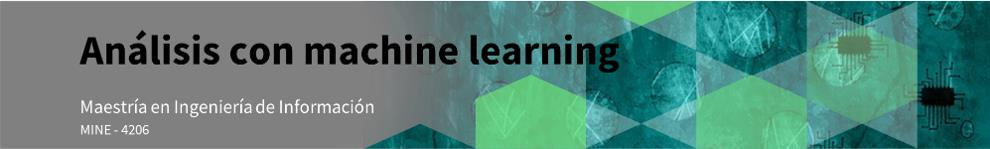

La fuente de los datos la puedes encontrar en [Airbnb price Dataset](https://www.kaggle.com/datasets/rupindersinghrana/airbnb-price-dataset).



# Entendimiento del negocio.

Para tener un mejor detalle sobre el comportamiento de las variables, solicitamos a la organización el diccionario de datos y nos suministró la siguiente información:

| ATRIBUTO | DEFINICIÓN |
| :- | :- |
| **id** | Corresponde al identificador.|
| **log_price** | Representa el precio de alquiler en escala logarítmica.|
| **property_type** | Esta variable representa el tipo de propiedad, cuenta con valores como `Apartment` y `House`.|
| **room_type** | Representa el tipo de habitación y tiene un total de 3 categorías. `Shared room`, `Entire home/apt` y `Private room`.|
| **amenities** | Representa las comodidades, los datos presentan una selección de valores de acuerdo con lo ofrecido en el arrendamiento.|
| **accommodates** | Representa el número máximo de huéspedes.|
| **bathrooms** | Representa el número de baños ofrecidos en el arrendamiento.|
| **bed_type** | Representa el tipo de habitación, cuenta con un total de 5 categorías `Real Bed`, `Futon`, `Pull-out-Sofa`, `Airbed` y `Couch`.|
| **cancellation_policy** | Representa la política de cancelación, con los valores `strict`, `flexible`, `moderate`, `super_strict_30` y `super_strict_60`.|
| **cleaning_fee** | Representa la política de limpieza, presenta categorías con valores `True` y `False` |
| **city** | Representa el nombre de las ciudades dónde se presta el servicio.|
| **description** | Representa la descripción del sitio con el servicio prestado. |
| **first_review** | Representa la fecha de la primera calificación.|
| **host_has_profile_pic** | Representa si el dueño del servicio tiene o no foto de perfil. |
| **host_identity_verified** | Representa si la identidad del dueño ha sido verificada, presenta categorías con valores `True` y `False`.|
| **host_response_rate** | Representa la tasa de respuesta por parte del dueño del servicio.|
| **host_since** | Representa la fecha desde que el dueño presta el servicio.|
| **instant_bookable** | Esta variable representa si permite reservar de forma rápida o instantánea, presenta categorías con valores `True` y `False`.|
| **last_review** | Representa la fecha de la última calificación.|
| **latitude** | Representa la coordenada geográfica asociada a la latitud. |
| **longitude** | Representa la coordenada geográfica asociada a la longitud. |
| **name** | Representa el nombre del sitio a rentar. |
| **neighbourhood** | Representa el valor asociado al vecindario del sitio de prestación del servicio. |
| **number_of_reviews** | Representa el número de calificaciones registradas. |
| **review_scores_rating** | Representa el puntaje de las calificaciones con rango de 0 a 100. |
| **thumbnail_url** | Representa la dirección url de la previsualización del sitio en la aplicación. |
| **zipcode** | Representa el código postal de la prestación del servicio. |
| **bedrooms** | Representa el número de habitaciones. |
| **beds** | Corresponde al número de camas ofrecidas en el servicio. |

## Exploración de los datos.

In [ ]:
ProfileReport(new_train)

Output hidden; open in https://colab.research.google.com to view.

## Insights obtenidos de la información.

Los datos tienen un total de 29 variables o características, un total de 47.430 instancias. No tiene instancias (filas) duplicadas.
Los tipos de datos para las variables se distribuyen de la siguiente forma:
* 10 numéricas.
* 5 categóricas.
* 7 de texto.
* 4 booleanas (verdadero y falso).
* 3 de fecha.


Las recomendaciones de tratamiento de la información para cada una de las características, son las siguientes:

|ATRIBUTO | PROPUESTA |
|---| :- |
| **id** | Se recomienda eliminar esta característica.|
| **property_type** | Cuenta con relativa cardinalidad alta, con un total de 34 categorías (`valores únicos`) e no balanceadas, teniendo en cuenta que `Apartment` y `House` predominan con algo más de 84% de la información. No presenta ausencias. Se recomienda mantener únicamente 3 categorías: `Apartment`, `House` y `Others`.|
| **room_type** | Tiene un total de 3 categorías. 'Shared room' es la más baja con el 2.9%. Se recomienda mantener estas 3 categorías y preguntar a la organización si es suficiente la información del atributo anterior.|
| **amenities** | Se recomienda crear nuevas características con las facilidades más comunes: TV, Internet, Pet friendly, Kid Friendly. No presenta ausencias. Se recomienda preguntar a la organización si es suficiente la información del atributo anterior; sin embargo, para este propósito se recomienda eliminar esta característica.|
| **accommodates** | Tiene alta correlación y los valores oscilan entre 1 y 16, con alta concentración de los que van desde 1 hasta 4. La categoría 2 representa el 42.7% de los datos, mientras que 1, 3 y 4 representan en 39.7% de los datos.  No presenta ausencias.|
| **bathrooms** | Sus valores que oscilan entre 1 y 8, con mayor concentración de 1 baño. Cuenta con 130 (0.3%) valores con cero, se recomienda preguntar a la organización si estos valores deben ser tenidos en cuenta o si son eliminados. Cuenta con 115 valores ausentes que representan el 0.2% de la información, se recomienda eliminar estos valores.|
| **bed_type** | Cuenta con un total de 5 categorías no balanceadas, dado que la mayor concentración se encuentra en `Real Bed`. No tiene ausencias. Se recomienda tener un tratamiento que mantenga las 5 categorías y agregar una categoría `Others` para otro valor distinto.|
| **cancellation_policy** | Presenta 5 categorías con alta concentración en los valores `strict`, `flexible` y `moderate`. Se recomienda para las categorías `super_strict_30` y `super_strict_60` como una única variable `super_strict`. No presenta ausencias. Se recomienda preguntar a la organización si es suficiente la información del atributo.|
| **cleaning_fee** | Presenta categorías con valores True y False, no se encuentran balanceados dado que True cuenta con un 73.4% de la información, mientras que el 26.6%. No presenta ausencias. Se recomienda transformar a valores numéricas 0 y 1.|
| **city** | Presenta 6 categorías no balanceadas y con mayor concentración en `NYC`, y `LA`, las cuáles suman un 74%. No presenta ausencias. Contamos con la información geográfica con las coordenadas de latitud y longitud, para un modelo avanzado, podría aplicarse una validación y limpieza en la que las coordenadas correspondan con la ciudad (intersección geográfica).|
| **description** | Cuenta con 47.180 valores únicos que representan un 99.5%. No presenta ausencias. |
| **first_review** | Cuenta con 2400 valores únicos que representan un 6.4% de los datos, tiene 10.130 valores ausentes que corresponden a un 21.4% de los datos. Se recomienda eliminar esta característica.|
| **host_has_profile_pic** | La variable no está balanceada, para el valor True cuenta con un 99.4% y False con un 0.3%. Tiene 122 valores ausentes que representan un 0.3% de los datos. Se recomienda preguntar a la organización si estos valores deben ser tenidos en cuenta o si son eliminados. |
| **host_identity_verified** | Esta variable representa si la identidad del dueño ha sido verificada, la cuál cuenta con las mismas categorías de la variable **host_has_profile_pic**, valores ausentes, así como la misma recomendación de consulta con la organización.|
| **host_response_rate** | Cuenta con 75 categorías que representan un 75.4% de la información. Tiene 11.649 valores ausentes que representan un 24.6% de la información. Se recomienda transformar esta variable a valor numérico y preguntar al negocio si las ausencias pueden ser imputadas con valor cero.|
| **host_since** | Tiene 122 valores ausentes que representan un 0.3% de los datos. Tiene fechas que van desde junio del año 2008 a octubre del año 2017. Este dato de fecha podría representar una tendencia cíclica, se recomienda transformar a valor numérico.|
| **instant_bookable** | Tiene 2 categorías con valor falso y verdadero, las categorías no están balanceadas y el valor False representa el 73.8% de la información. No presenta ausencias.|
| **last_review** | Sus valores oscilan desde enero del año 2009 a octubre del año 2017. Tiene 10.106 valores ausentes que representan el 21.3% de la información.|
| **latitude** | No presenta ausencias.|
| **longitude** | No presenta ausencias.|
| **name** | Se recomienda eliminar esta característica.|
| **neighbourhood** | Cuenta con 601 categorías (alta cardinalidad). Tiene 4.419 valores ausentes que representan el 9.3% de la información. Se recomienda eliminar esta característica.|
| **number_of_reviews** | Cuyos valores oscilan entre 0 y 605. No presenta ausencias. Tiene 10.103 valores ausentes que representan un 21.3% de la información. Se recomienda preguntar a la organización si estos valores cero son representativos.|
| **review_scores_rating** | Sus valores oscilan desde 20 hasta 100. Tiene 10.680 valores ausentes que representan el 22.5% de los datos. Se recomienda preguntar al negocio si las ausencias pueden ser imputadas o eliminadas.|
| **thumbnail_url** | Tiene 5.213 valores ausentes que corresponden al 11% de la información. Para un modelo avanzado, podría aplicarse una validación de direcciones url válidas y formato válido de imagen; sin embargo, para este propósito se recomienda eliminar esta característica.|
| **zipcode** | Cuenta con 607 valores ausentes que representan el 1.3% de la información. Con el contexto y modelos de predicción esperados por el negocio, no sería una característica representativa, se recomienda eliminar esta característica.|
| **bedrooms** | Sus valores oscilan entre 0 y 10, dónde 4.367 valores corresponden a cero y representan un 9.2% de la información. Se recomienda preguntar a la organización si esto es correcto y representativo en el servicio prestado. Tiene 53 valores ausentes que corresponden al 0.1% de la información.|
| **beds** | Sus valores oscilan entre 0 y 18, 3 valores representan valores cero y corresponden a menos del .1% de la información, se recomienda preguntar a la organización si este valor es correcto y representativo en el servicio prestado. Tiene 82 valores ausentes que corresponden al 0.2% de la información.|